In [1]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import glob
import os

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

In [2]:
print(os.getcwd())

/Users/izuwaahanor/Documents/Research/branchAndBound/cppCodes/OneTree/diversenearoptimal/pythonPlots


In [3]:
mearged = []
totalLen = 0
path = os.getcwd() + "/*.csv"
for fileName in glob.glob(path):
    print(fileName)
    tmp = pd.read_csv(fileName)
    print(len(tmp))
    totalLen += len(tmp)
    mearged.append(tmp)
    
data = pd.concat(mearged)

print(len(data))
print(len(data) == totalLen)
data.head()
# data

/Users/izuwaahanor/Documents/Research/branchAndBound/cppCodes/OneTree/diversenearoptimal/pythonPlots/results(3).csv
8
/Users/izuwaahanor/Documents/Research/branchAndBound/cppCodes/OneTree/diversenearoptimal/pythonPlots/results(2).csv
8
/Users/izuwaahanor/Documents/Research/branchAndBound/cppCodes/OneTree/diversenearoptimal/pythonPlots/results(5).csv
8
/Users/izuwaahanor/Documents/Research/branchAndBound/cppCodes/OneTree/diversenearoptimal/pythonPlots/results(4).csv
8
/Users/izuwaahanor/Documents/Research/branchAndBound/cppCodes/OneTree/diversenearoptimal/pythonPlots/results(7).csv
8
/Users/izuwaahanor/Documents/Research/branchAndBound/cppCodes/OneTree/diversenearoptimal/pythonPlots/results(6).csv
8
/Users/izuwaahanor/Documents/Research/branchAndBound/cppCodes/OneTree/diversenearoptimal/pythonPlots/results(1).csv
8
/Users/izuwaahanor/Documents/Research/branchAndBound/cppCodes/OneTree/diversenearoptimal/pythonPlots/results.csv
8
64
True


Problem  CBFS0.000000  CBFS0.000000NodesProcessed  \
0   gt2.mps(50)      0.065442                        2142   
1  gt2.mps(100)      0.062172                        4547   
2  gt2.mps(250)      0.061017                        8104   
3  gt2.mps(500)      0.062051                       14739   
4  gt2.mps(750)      0.061563                       20212   

   CBFS0.000000NumSols  CBFS0.000000Time(ms)  CBFS0.010000  \
0                   50           2757.402100      0.040272   
1                  100           3543.370117      0.065202   
2                  250           4477.973145      0.052770   
3                  500           6520.463379      0.053607   
4                  750           7228.498535      0.056275   

   CBFS0.010000NodesProcessed  CBFS0.010000NumSols  CBFS0.010000Time(ms)  \
0                         816                   50            661.827515   
1                        1916                  100           1310.378662   
2                        3596                  250           2714.909668   
3                        5954                  500           5312.000488   
4                        9545                  750           9983.801758   

   CBFS0.020000  ...  DFSNumSols  DFSTime(ms)       UCT  UCTNodesProcessed  \
0      0.040272  ...          50   528.847839  0.071361                771   
1      0.065202  ...         100   551.304688  0.053046               1182   
2      0.052770  ...         250   641.290466  0.066612               1817   
3      0.053607  ...         500  1065.308350  0.070693               2874   
4      0.056275  ...         750  1205.924438  0.067798               4024   

   UCTNumSols  UCTTime(ms)  hybridestim  hybridestimNodesProcessed  \
0          50   661.553345     0.064626                       1117   
1         100   787.381287     0.063637                       1534   
2         250   954.686646     0.067607                       2246   
3         500  1501.427979     0.067370                       5726   
4         750  2059.930908     0.065990                       8114   

   hybridestimNumSols  hybridestimTime(ms)  
0                  50           438.272064  
1                 100           523.219360  
2                 250           653.525818  
3                 500          1733.479248  
4                 750          2294.189209  

[5 rows x 97 columns]

In [9]:
# data = pd.read_csv("../results.csv")

In [10]:
# data.head()

In [4]:
data[['Problem','SolCount']] = data['Problem'].str.split("(",expand=True)
data.head()

Problem  CBFS0.000000  CBFS0.000000NodesProcessed  CBFS0.000000NumSols  \
0  gt2.mps      0.065442                        2142                   50   
1  gt2.mps      0.062172                        4547                  100   
2  gt2.mps      0.061017                        8104                  250   
3  gt2.mps      0.062051                       14739                  500   
4  gt2.mps      0.061563                       20212                  750   

   CBFS0.000000Time(ms)  CBFS0.010000  CBFS0.010000NodesProcessed  \
0           2757.402100      0.040272                         816   
1           3543.370117      0.065202                        1916   
2           4477.973145      0.052770                        3596   
3           6520.463379      0.053607                        5954   
4           7228.498535      0.056275                        9545   

   CBFS0.010000NumSols  CBFS0.010000Time(ms)  CBFS0.020000  ...  DFSTime(ms)  \
0                   50            661.827515      0.040272  ...   528.847839   
1                  100           1310.378662      0.065202  ...   551.304688   
2                  250           2714.909668      0.052770  ...   641.290466   
3                  500           5312.000488      0.053607  ...  1065.308350   
4                  750           9983.801758      0.056275  ...  1205.924438   

        UCT  UCTNodesProcessed  UCTNumSols  UCTTime(ms)  hybridestim  \
0  0.071361                771          50   661.553345     0.064626   
1  0.053046               1182         100   787.381287     0.063637   
2  0.066612               1817         250   954.686646     0.067607   
3  0.070693               2874         500  1501.427979     0.067370   
4  0.067798               4024         750  2059.930908     0.065990   

   hybridestimNodesProcessed  hybridestimNumSols  hybridestimTime(ms)  \
0                       1117                  50           438.272064   
1                       1534                 100           523.219360   
2                       2246                 250           653.525818   
3                       5726                 500          1733.479248   
4                       8114                 750          2294.189209   

   SolCount  
0       50)  
1      100)  
2      250)  
3      500)  
4      750)  

[5 rows x 98 columns]

In [5]:
data['SolCount']= pd.to_numeric(data['SolCount'].str.split(")",expand=True)[0])
data.head()

Problem  CBFS0.000000  CBFS0.000000NodesProcessed  CBFS0.000000NumSols  \
0  gt2.mps      0.065442                        2142                   50   
1  gt2.mps      0.062172                        4547                  100   
2  gt2.mps      0.061017                        8104                  250   
3  gt2.mps      0.062051                       14739                  500   
4  gt2.mps      0.061563                       20212                  750   

   CBFS0.000000Time(ms)  CBFS0.010000  CBFS0.010000NodesProcessed  \
0           2757.402100      0.040272                         816   
1           3543.370117      0.065202                        1916   
2           4477.973145      0.052770                        3596   
3           6520.463379      0.053607                        5954   
4           7228.498535      0.056275                        9545   

   CBFS0.010000NumSols  CBFS0.010000Time(ms)  CBFS0.020000  ...  DFSTime(ms)  \
0                   50            661.827515      0.040272  ...   528.847839   
1                  100           1310.378662      0.065202  ...   551.304688   
2                  250           2714.909668      0.052770  ...   641.290466   
3                  500           5312.000488      0.053607  ...  1065.308350   
4                  750           9983.801758      0.056275  ...  1205.924438   

        UCT  UCTNodesProcessed  UCTNumSols  UCTTime(ms)  hybridestim  \
0  0.071361                771          50   661.553345     0.064626   
1  0.053046               1182         100   787.381287     0.063637   
2  0.066612               1817         250   954.686646     0.067607   
3  0.070693               2874         500  1501.427979     0.067370   
4  0.067798               4024         750  2059.930908     0.065990   

   hybridestimNodesProcessed  hybridestimNumSols  hybridestimTime(ms)  \
0                       1117                  50           438.272064   
1                       1534                 100           523.219360   
2                       2246                 250           653.525818   
3                       5726                 500          1733.479248   
4                       8114                 750          2294.189209   

   SolCount  
0        50  
1       100  
2       250  
3       500  
4       750  

[5 rows x 98 columns]

In [6]:
cols = [col for col in data.columns if "Num" not in col]
cols

['Problem',
 'CBFS0.000000',
 'CBFS0.000000NodesProcessed',
 'CBFS0.000000Time(ms)',
 'CBFS0.010000',
 'CBFS0.010000NodesProcessed',
 'CBFS0.010000Time(ms)',
 'CBFS0.020000',
 'CBFS0.020000NodesProcessed',
 'CBFS0.020000Time(ms)',
 'CBFS0.030000',
 'CBFS0.030000NodesProcessed',
 'CBFS0.030000Time(ms)',
 'CBFS0.040000',
 'CBFS0.040000NodesProcessed',
 'CBFS0.040000Time(ms)',
 'CBFS0.050000',
 'CBFS0.050000NodesProcessed',
 'CBFS0.050000Time(ms)',
 'CBFS0.060000',
 'CBFS0.060000NodesProcessed',
 'CBFS0.060000Time(ms)',
 'CBFS0.070000',
 'CBFS0.070000NodesProcessed',
 'CBFS0.070000Time(ms)',
 'CBFS0.080000',
 'CBFS0.080000NodesProcessed',
 'CBFS0.080000Time(ms)',
 'CBFS0.090000',
 'CBFS0.090000NodesProcessed',
 'CBFS0.090000Time(ms)',
 'CBFS0.100000',
 'CBFS0.100000NodesProcessed',
 'CBFS0.100000Time(ms)',
 'CBFS0.200000',
 'CBFS0.200000NodesProcessed',
 'CBFS0.200000Time(ms)',
 'CBFS0.300000',
 'CBFS0.300000NodesProcessed',
 'CBFS0.300000Time(ms)',
 'CBFS0.400000',
 'CBFS0.400000NodesPro

In [7]:
data = data[cols]
data.head()

print(len(data))

# data = data.loc[data['SolCount']<=1000,:]
# print(len(data))

64


In [8]:
allNodeTypes = [i for i in list(data) if i not in ['Problem','SolCount'] and 'Process' not in i and 'Time' not in i and 'Num' not in i]
allNodeTypes

['CBFS0.000000',
 'CBFS0.010000',
 'CBFS0.020000',
 'CBFS0.030000',
 'CBFS0.040000',
 'CBFS0.050000',
 'CBFS0.060000',
 'CBFS0.070000',
 'CBFS0.080000',
 'CBFS0.090000',
 'CBFS0.100000',
 'CBFS0.200000',
 'CBFS0.300000',
 'CBFS0.400000',
 'CBFS0.500000',
 'CBFS0.600000',
 'CBFS0.700000',
 'CBFS0.800000',
 'CBFS0.900000',
 'CBFS1.000000',
 'BFS',
 'DFS',
 'UCT',
 'hybridestim']

In [9]:
allProblems = list(set(data['Problem']))
allProblems

['dcmulti.mps',
 'modglob.mps',
 'gt2.mps',
 'set1ch.mps',
 'vpm1.mps',
 'bell3a.mps',
 'gen.mps',
 'misc06.mps']

In [10]:
solCount = list(set(data['SolCount']))
solCount = sorted(solCount)
solCount

[50, 100, 250, 500, 750, 1000, 1500, 2000]

In [11]:
seaBData = pd.DataFrame()

for i in allNodeTypes:
    tmp = pd.DataFrame(data.loc[data['Problem']=='gen.mps'].groupby(['Problem','SolCount']).agg({i:'last'}).reset_index())
    tmp['NodeType'] = i #dictNodeType.get(i)
    tmp.rename(columns = {i:"values"},  inplace=True)
#     print(tmp)
    seaBData = seaBData.append(tmp)

seaBData  = seaBData.sort_values(by='NodeType', ascending = False)
seaBData

Problem  SolCount    values     NodeType
7   gen.mps      2000  0.068256  hybridestim
6   gen.mps      1500  0.067159  hybridestim
5   gen.mps      1000  0.065103  hybridestim
4   gen.mps       750  0.062883  hybridestim
3   gen.mps       500  0.060057  hybridestim
..      ...       ...       ...          ...
3   gen.mps       500  0.126169          BFS
2   gen.mps       250  0.147016          BFS
1   gen.mps       100  0.162320          BFS
0   gen.mps        50  0.174654          BFS
6   gen.mps      1500  0.098532          BFS

[192 rows x 4 columns]

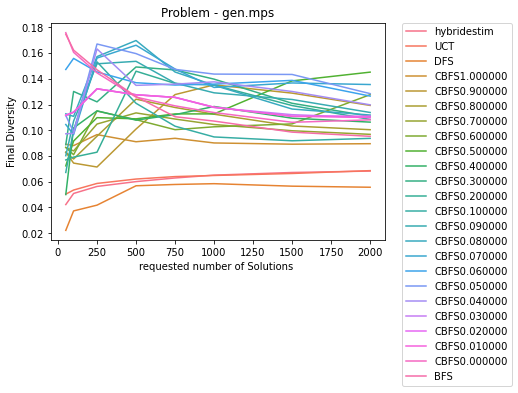

In [12]:
seaBData = seaBData[~seaBData['NodeType'].str.contains('Time|Num')]
sns.lineplot(data=seaBData,y='values',x='SolCount', hue='NodeType')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.xlabel("requested number of Solutions ")
plt.ylabel("Final Diversity")
plt.title("Problem - gen.mps")
# plt.xticks(solCount)
plt.show()

In [132]:

allNodeTypes = [i for i in list(data) if i not in ['Problem','SolCount'] and 'Process' not in i and 'CBFS' not in i and 'Time' not in i and 'Num' not in i]
palette ={'hybridestim': "grey", 'UCT': "magenta",'BFS': "black", 'DFS': "blue"}


#PRePARE THE DATA 
seaBData = pd.DataFrame()
for k in range(8):
    if 'bell' not in allProblems[k]:
        for i in allNodeTypes:
            tmp = pd.DataFrame(data.loc[data['Problem']==allProblems[k]].groupby(['Problem','SolCount']).agg({i:'last'}).reset_index())
            tmp['NodeType'] = i #dictNodeType.get(i)
            tmp.rename(columns = {i:"values"},  inplace=True)
        #     print(tmp)

            seaBData = seaBData.append(tmp)
        
seaBData = seaBData.loc[seaBData['SolCount']<=max(solCount)]
seaBData  = seaBData.sort_values(by='Problem', ascending = True)
seaBData
    

    
    
#PLOT THE DATA
# column_order = ['dcmulti.mps','vpm1.mps', 'gen.mps','modglob.mps','gt2.mps','misc06.mps','set1ch.mps']
with sns.plotting_context(font_scale=5.5):
    g = sns.FacetGrid(seaBData, col="Problem" ,hue="NodeType", sharey= False,  col_wrap=2, aspect=1.5, height = 4, palette=palette)
    g.map(sns.lineplot, "SolCount", "values")
    g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=14)
    g.set_axis_labels("Requested Number of solutions ", "Diversity", fontsize=12)
    g.add_legend(loc='upper right', fontsize=12)

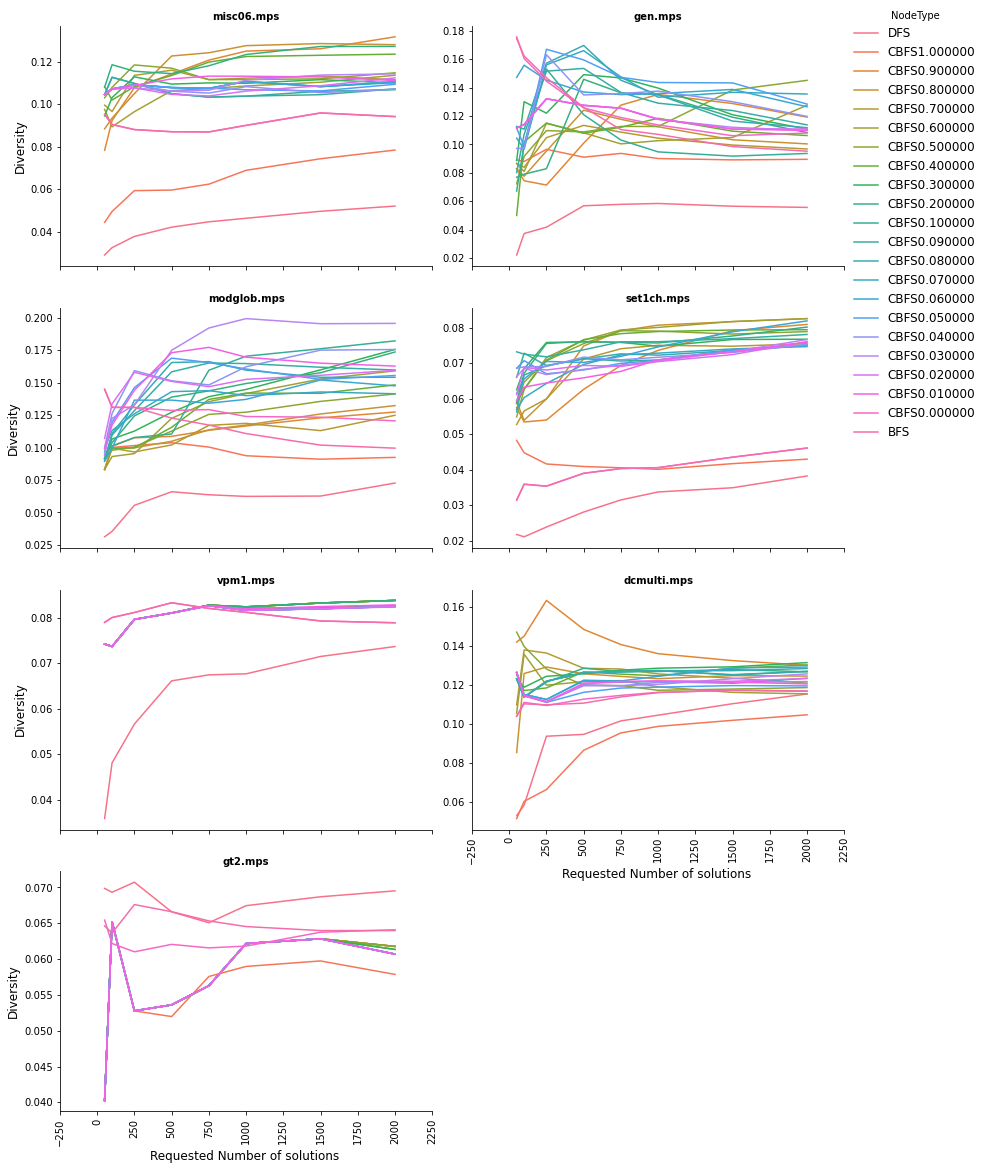

In [137]:

allNodeTypes = [i for i in list(data) if i not in ['Problem','SolCount', 'UCT', 'hybridestim'] and 'Process' not in i and 'Time' not in i and 'Num' not in i]
# palette ={'CBFS0.000000': "yellow",'CBFS0.000100': "maroon",'CBFS100.000000': "pink", 'CBFS0.100000': "grey", 'CBFS0.500000': "magenta",'BFS': "black", 'CBFS0.000010': "orange", 'CBFS10.000000': "brown", 'CBFS1.000000': "green", 'CBFS0.001000': "purple", 'CBFS1000.000000': "red", 'DFS': "blue"}

seaBData = pd.DataFrame()

for k in range(8):

    if 'bell' not in allProblems[k]:
        for i in allNodeTypes:
            tmp = pd.DataFrame(data.loc[data['Problem']==allProblems[k]].groupby(['Problem','SolCount']).agg({i:'last'}).reset_index())
            tmp['NodeType'] = i #dictNodeType.get(i)
            tmp.rename(columns = {i:"values"},  inplace=True)

            seaBData = seaBData.append(tmp)

seaBData  = seaBData.sort_values(by='NodeType', ascending = False)
seaBData


#PLOT THE DATA
# column_order = ['dcmulti.mps','vpm1.mps', 'gen.mps','modglob.mps','gt2.mps','misc06.mps','set1ch.mps']
with sns.plotting_context(font_scale=5.5):
    g = sns.FacetGrid(seaBData, col="Problem", sharey=False,  hue="NodeType", col_wrap=2, aspect=1.5, height = 4)
    g.map(sns.lineplot, "SolCount", "values")
    g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=14)
    g.set_axis_labels("Requested Number of solutions ", "Diversity", fontsize=12)
    g.set_xticklabels(rotation=90)
    g.add_legend(loc='upper right', fontsize=12)

In [82]:
allNodeTypes = [i for i in list(data) if i not in ['DFS', 'BFS', 'Problem','SolCount', 'UCT', 'hybridestim'] and 'max' not in i  and 'Diversity' not in i and 'Process' not in i and 'Time' not in i and 'Num' not in i]
allNodeTypes

['CBFS0.000000',
 'CBFS0.010000',
 'CBFS0.020000',
 'CBFS0.030000',
 'CBFS0.040000',
 'CBFS0.050000',
 'CBFS0.060000',
 'CBFS0.070000',
 'CBFS0.080000',
 'CBFS0.090000',
 'CBFS0.100000',
 'CBFS0.200000',
 'CBFS0.300000',
 'CBFS0.400000',
 'CBFS0.500000',
 'CBFS0.600000',
 'CBFS0.700000',
 'CBFS0.800000',
 'CBFS0.900000',
 'CBFS1.000000']

In [135]:
allNodeTypes = [i for i in list(data) if i not in ['DFS', 'BFS', 'Problem','SolCount', 'UCT', 'hybridestim'] and 'max' not in i  and 'Diversity' not in i and 'Process' not in i and 'Time' not in i and 'Num' not in i]
# plotNodes = [float(i[4:]) for i in allNodeTypes]
# plotNodes

seaBData = pd.DataFrame()

for k in range(8):

    if 'bell' not in allProblems[k]: 
        for i in allNodeTypes:
            tmp = pd.DataFrame(data.loc[data['Problem']==allProblems[k]].groupby(['Problem','SolCount']).agg({i:'last'}).reset_index())
            tmp['NodeType'] = float(i[4:]) #dictNodeType.get(i)
            tmp.rename(columns = {i:"values"},  inplace=True)

            seaBData = seaBData.append(tmp)

seaBData  = seaBData.sort_values(by='NodeType', ascending = False)
# seaBData.head()

#PLOT THE DATA
# column_order = ['dcmulti.mps','vpm1.mps', 'gen.mps','modglob.mps','gt2.mps','misc06.mps','set1ch.mps']
with sns.plotting_context(font_scale=5.5):
    g = sns.FacetGrid(seaBData, col="Problem" ,hue="SolCount", sharey=False, palette='RdPu' , col_wrap=2, aspect=1.5, height = 4)
    g.map(sns.lineplot, "NodeType", "values", alpha=.7)
    g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=14)
    g.set_axis_labels("Alpha Values", "Diversity", fontsize=12)
    g.set_xticklabels(rotation=90)
    g.add_legend(loc='upper right', fontsize=12)

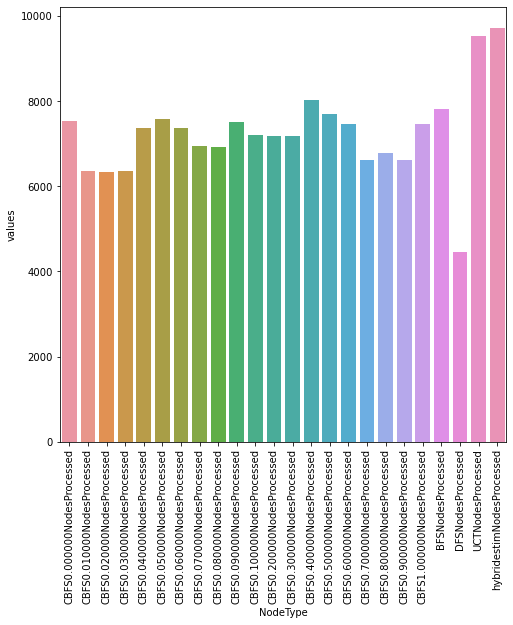

In [121]:
fig, axs = plt.subplots(figsize=(8,8))
props = {"rotation" : 90}

allNodeTypes = [i for i in list(data) if i not in ['Problem','SolCount'] and 'Process' in i]
# palette ={'CBFS0.000000Time(ms)': "yellow",'CBFS0.000100Time(ms)': "maroon",'CBFS100.000000Time(ms)': "pink", 'CBFS0.100000Time(ms)': "grey", 'CBFS0.500000Time(ms)': "magenta",'BFSTime(ms)': "black", 'CBFS0.000010Time(ms)': "orange", 'CBFS10.000000Time(ms)': "brown", 'CBFS1.000000Time(ms)': "green", 'CBFS0.001000Time(ms)': "purple", 'CBFS1000.000000Time(ms)': "red", 'DFSTime(ms)': "blue"}
    
seaBData = pd.DataFrame()

for i in allNodeTypes:
    tmp = pd.DataFrame(data.loc[data['Problem']=='gen.mps'].groupby(['Problem']).agg({i:'last'}).reset_index())
    tmp['NodeType'] = i
    tmp.rename(columns = {i:"values"},  inplace=True)
#     print(tmp)

    seaBData = seaBData.append(tmp)

seaBData
sns.barplot(data=seaBData,y='values',x='NodeType')
plt.setp(axs.get_xticklabels(), **props)
plt.show()


In [139]:
allNodeTypes = [i for i in list(data) if i not in ['Problem','SolCount'] and 'Process' in i]
# palette ={'CBFS0.000000Time(ms)': "yellow",'CBFS0.000100Time(ms)': "maroon",'CBFS100.000000Time(ms)': "pink", 'CBFS0.100000Time(ms)': "grey", 'CBFS0.500000Time(ms)': "magenta",'BFSTime(ms)': "black", 'CBFS0.000010Time(ms)': "orange", 'CBFS10.000000Time(ms)': "brown", 'CBFS1.000000Time(ms)': "green", 'CBFS0.001000Time(ms)': "purple", 'CBFS1000.000000Time(ms)': "red", 'DFSTime(ms)': "blue"}
nodeMap = {'CBFS0.000000NodesProcessed':'D-BFS0',
 'CBFS0.010000NodesProcessed':'D-BFS0.01',
 'CBFS0.020000NodesProcessed':'D-BFS0.02',
 'CBFS0.030000NodesProcessed':'D-BFS0.03',
 'CBFS0.040000NodesProcessed':'D-BFS0.04',
 'CBFS0.050000NodesProcessed':'D-BFS0.05',
 'CBFS0.060000NodesProcessed':'D-BFS0.06',
 'CBFS0.070000NodesProcessed':'D-BFS0.07',
 'CBFS0.080000NodesProcessed':'D-BFS0.08',
 'CBFS0.090000NodesProcessed':'D-BFS0.09',
 'CBFS0.100000NodesProcessed':'D-BFS0.1',
 'CBFS0.200000NodesProcessed':'D-BFS0.2',
 'CBFS0.300000NodesProcessed':'D-BFS0.3',
 'CBFS0.400000NodesProcessed':'D-BFS0.4',
 'CBFS0.500000NodesProcessed':'D-BFS0.5',
 'CBFS0.600000NodesProcessed':'D-BFS0.6',
 'CBFS0.700000NodesProcessed':'D-BFS0.7',
 'CBFS0.800000NodesProcessed':'D-BFS0.8',
 'CBFS0.900000NodesProcessed':'D-BFS0.7',
 'CBFS1.000000NodesProcessed':'D-BFS1',
 'BFSNodesProcessed':'BFS',
 'DFSNodesProcessed':'DFS',
 'UCTNodesProcessed':'UCT',
 'hybridestimNodesProcessed':'Hybidestim'}

seaBData = pd.DataFrame()
for k in range(8):
    if 'bell' not in allProblems[k]:
        for i in allNodeTypes:
            tmp = pd.DataFrame(data.loc[data['Problem']==allProblems[k]].groupby(['Problem']).agg({i:'last'}).reset_index())
            tmp['NodeType'] = nodeMap.get(i)
            tmp.rename(columns = {i:"values"},  inplace=True)
        #     print(tmp)

            seaBData = seaBData.append(tmp)
    
seaBData  = seaBData.sort_values(by='NodeType', ascending = False)
seaBData.head()


#PLOT THE DATA    sns.barplot(data=seaBData,y='values',x='NodeType', ax =  axs[k//2, plotCounter], ci=None)
# column_order = ['dcmulti.mps','vpm1.mps', 'gen.mps','modglob.mps','gt2.mps','misc06.mps','set1ch.mps']
with sns.plotting_context(font_scale=5.5):
    g = sns.FacetGrid(seaBData, col="Problem", sharey=False, col_wrap=2, aspect=1.5, height = 4)
    g.map(sns.barplot, "NodeType", "values", alpha=.7)
    g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=14)
    g.set_axis_labels("Node. Selectoin Type", "Number of Processed Nodes", fontsize=12)
    g.set_xticklabels(rotation=90)
    g.add_legend(loc='upper right', fontsize=12)

/Users/izuwaahanor/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


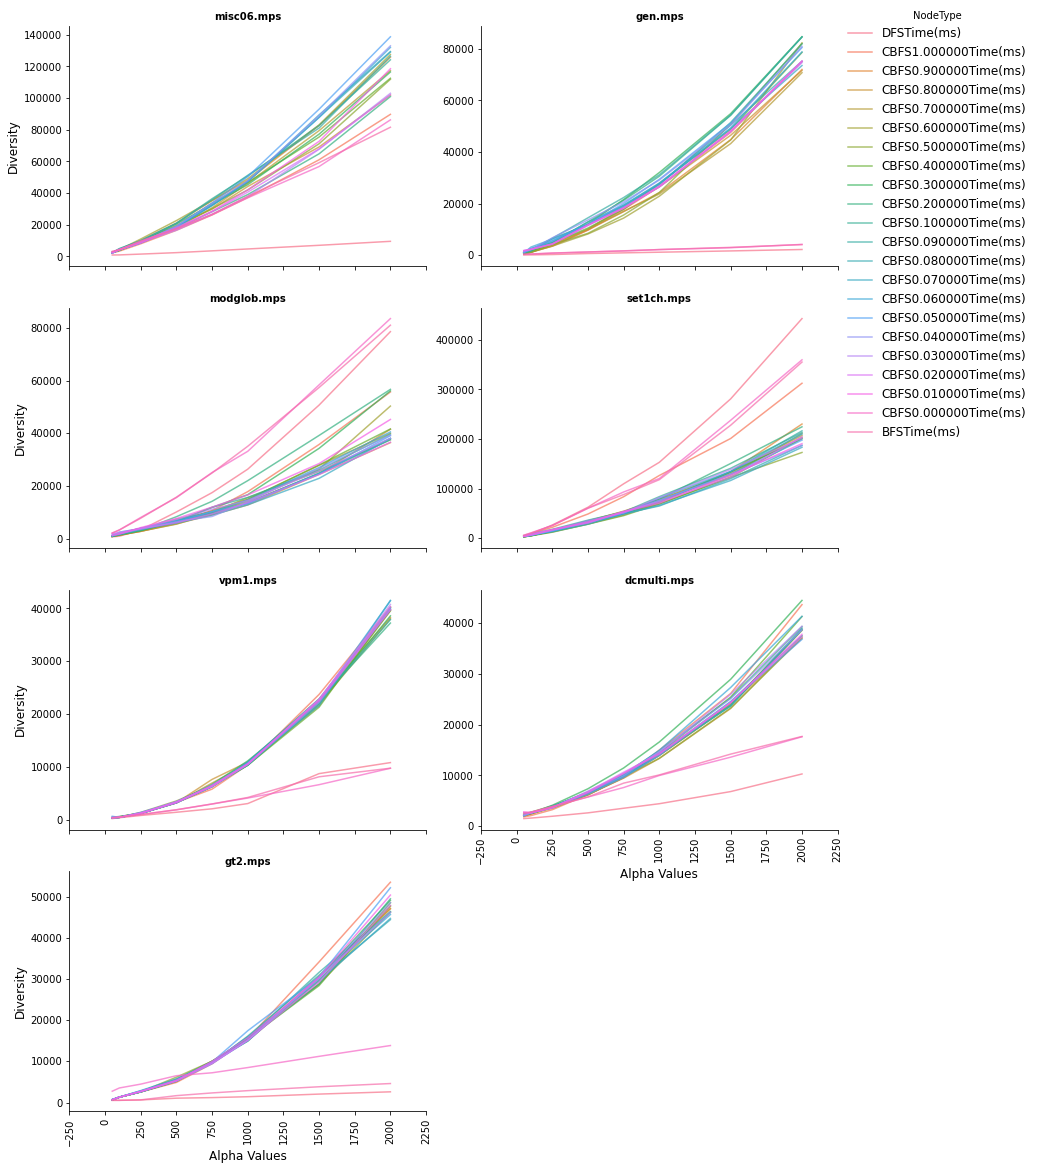

In [143]:
allNodeTypes = [i for i in list(data) if i not in ['Problem','SolCount'] and 'UCT' not in i and 'hybrid' not in i and 'Time' in i]
# palette ={'CBFS0.000000Time(ms)': "yellow",'CBFS0.000100Time(ms)': "maroon",'CBFS100.000000Time(ms)': "pink", 'CBFS0.100000Time(ms)': "grey", 'CBFS0.500000Time(ms)': "magenta",'BFSTime(ms)': "black", 'CBFS0.000010Time(ms)': "orange", 'CBFS10.000000Time(ms)': "brown", 'CBFS1.000000Time(ms)': "green", 'CBFS0.001000Time(ms)': "purple", 'CBFS1000.000000Time(ms)': "red", 'DFSTime(ms)': "blue"}

seaBData = pd.DataFrame()

for k in range(8):
    if 'bell' not in allProblems[k]:
        

        for i in allNodeTypes:
            tmp = pd.DataFrame(data.loc[data['Problem']==allProblems[k]].groupby(['Problem','SolCount']).agg({i:'last'}).reset_index())
            tmp['NodeType'] = i
            tmp.rename(columns = {i:"values"},  inplace=True)

            seaBData = seaBData.append(tmp)
    
seaBData  = seaBData.sort_values(by='NodeType', ascending = False)
seaBData.head()


#PLOT THE DATA
# column_order = ['dcmulti.mps','vpm1.mps', 'gen.mps','modglob.mps','gt2.mps','misc06.mps','set1ch.mps']
with sns.plotting_context(font_scale=5.5):
    g = sns.FacetGrid(seaBData, col="Problem" ,hue="NodeType", sharey=False, col_wrap=2, aspect=1.5, height = 4)
    g.map(sns.lineplot, "SolCount", "values", alpha=.7)
    g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=14)
    g.set_axis_labels("Alpha Values", "Diversity", fontsize=12)
    g.set_xticklabels(rotation=90)
    g.add_legend(loc='upper right', fontsize=12)

# TRYING OUT ANOVA TESTS

In [144]:
# seaBData = pd.DataFrame()

# allNodeTypes = [i for i in list(data) if i not in ['Problem','SolCount'] and 'Time' not in i and 'Num' not in i]
# # solCount = [50, 100, 250, 500, 750, 1000, 2000]

# for i in allNodeTypes:
#     for j in allProblems:
#         tmp = pd.DataFrame(data.loc[data['Problem']==j].groupby(['Problem','SolCount']).agg({i:'last'}).reset_index())
#         tmp['NodeType'] = i #dictNodeType.get(i)
#         tmp.rename(columns = {i:"values"},  inplace=True)
#     #     print(tmp)
#         seaBData = seaBData.append(tmp)

# seaBData = seaBData.loc[seaBData['SolCount']<=max(solCount)]
# seaBData  = seaBData.sort_values(by='NodeType', ascending = False)
# seaBData

In [145]:
# d20 = seaBData.loc[seaBData['SolCount']==50,:]
# print(len(d20))
# d20 = d20[~d20.NodeType.isin(['DFS','CBFS0.0','BFS'])]
# print(len(d20))
# d20.head()

In [146]:
# fig,ax = plt.subplots(figsize=(10,8))
# ax = sns.boxplot(x='NodeType', y='values', data=d20)
# ax = sns.swarmplot(x='NodeType', y='values', data=d20)
# plt.show()

# Check Means

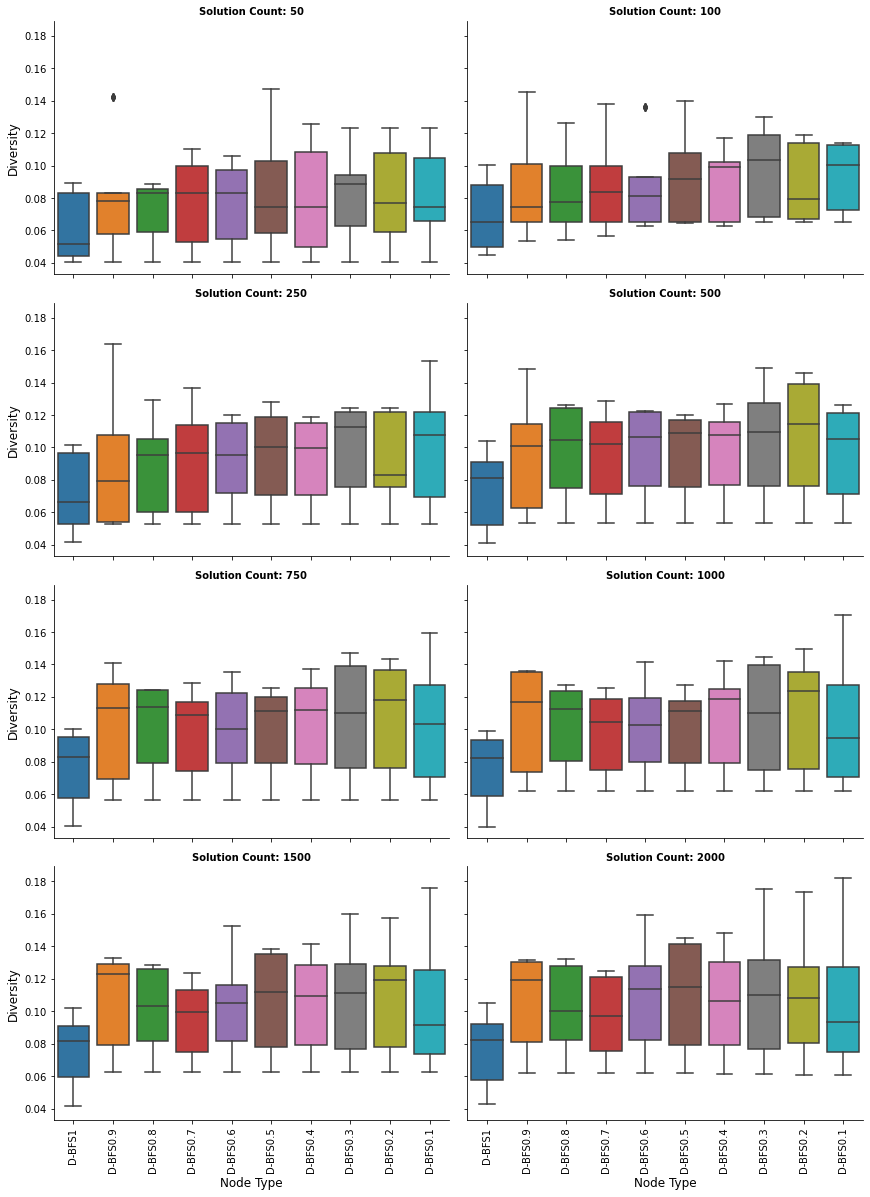

In [177]:
allNodeTypes = [i for i in list(data) if i not in ['CBFS0.080000','CBFS0.090000','CBFS0.010000','CBFS0.020000','CBFS0.030000','CBFS0.040000','CBFS0.040000','CBFS0.050000','CBFS0.060000','CBFS0.070000','CBFS0.000000','UCT','hybridestim','Problem','SolCount'] and 'Process' not in i and 'Diversity' not in i and 'max' not in i and 'Time' not in i and 'Num' not in i]
nodeMap = {'CBFS0.100000':'D-BFS0.1',
 'CBFS0.200000':'D-BFS0.2',
 'CBFS0.300000':'D-BFS0.3',
 'CBFS0.400000':'D-BFS0.4',
 'CBFS0.500000':'D-BFS0.5',
 'CBFS0.600000':'D-BFS0.6',
 'CBFS0.700000':'D-BFS0.7',
 'CBFS0.800000':'D-BFS0.8',
 'CBFS0.900000':'D-BFS0.9',
 'CBFS1.000000':'D-BFS1',
 'BFS':'BFS',
 'DFS':'DFS'}
 
# palette ={'CBFS100.0': "pink", 'CBFS0.1': "grey", 'CBFS0.5': "magenta",'BFS': "black", 'CBFS10000.0': "orange", 'CBFS10.0': "brown", 'CBFS1.0': "green", 'CBFS0.0': "purple", 'CBFS1000.0': "red", 'DFS': "blue"}

boxPlotData = pd.DataFrame()

for k in range(8): 
    for i in allNodeTypes:
        if i not in ['DFS','CBFS0.0','BFS']:
            for j in allProblems:
                if 'bell' not in j:
                    tmp = pd.DataFrame(data.loc[data['Problem']==j].groupby(['Problem','SolCount']).agg({i:'last'}).reset_index())
                    tmp['NodeType'] = nodeMap.get(i) #dictNodeType.get(i)
                    tmp.rename(columns = {i:"values"},  inplace=True)
                    boxPlotData = boxPlotData.append(tmp)

boxPlotData  = boxPlotData.sort_values(by='NodeType', ascending = False)
boxPlotData.head()


#PLOT THE DATA
# column_order = ['dcmulti.mps','vpm1.mps', 'gen.mps','modglob.mps','gt2.mps','misc06.mps','set1ch.mps']
with sns.plotting_context(font_scale=5.5):
    g = sns.catplot(x="NodeType", y="values",hue="NodeType", dodge=False, col_wrap=2, col="SolCount",data=boxPlotData, kind="box",height=4, aspect=1.5);
#     g.map(sns.swarmplot, "NodeType", "values")
    g.set_titles(col_template="Solution Count: {col_name}", fontweight='bold', fontsize=14)
    g.set_axis_labels("Node Type", "Diversity", fontsize=12)
    g.set_xticklabels(rotation=90)
#     g.add_legend(loc='upper right', fontsize=12)


In [90]:
# Clearly all the means seem similar

In [ ]:
# Test for equality of Variance:
# Bartletts or Levenes Test - Both Have:
# NULL Hypotheses: The variances are equal across all samples/groups
# Alternative Hypotheses: The Varainves are not equal across all the samples/groups


# CHECK NORMALITY

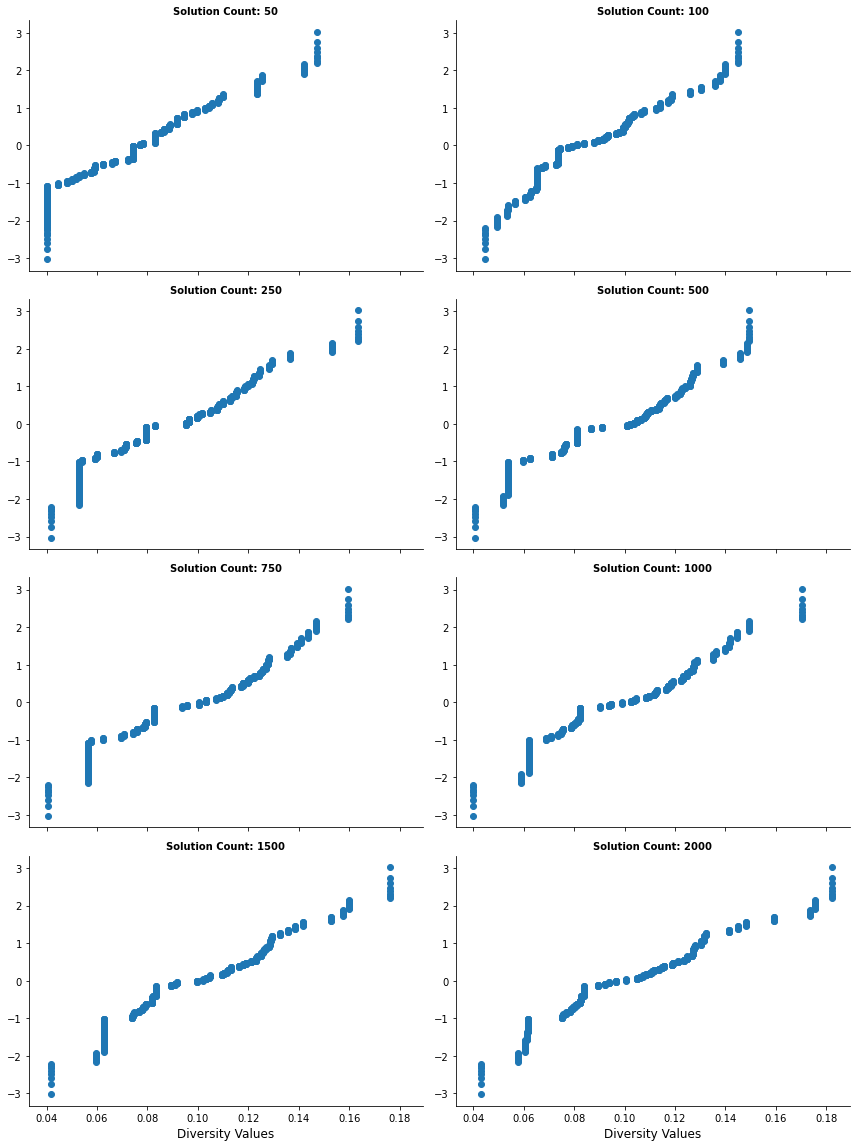

In [182]:
from scipy import stats

def quantile_plot(x, **kwargs):
    quantiles, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, quantiles, **kwargs)


allNodeTypes = [i for i in list(data) if i not in ['CBFS0.080000','CBFS0.090000','CBFS0.010000','CBFS0.020000','CBFS0.030000','CBFS0.040000','CBFS0.040000','CBFS0.050000','CBFS0.060000','CBFS0.070000','CBFS0.000000','UCT','hybridestim','Problem','SolCount'] and 'Process' not in i and 'Diversity' not in i and 'max' not in i and 'Time' not in i and 'Num' not in i]
nodeMap = {'CBFS0.100000':'D-BFS0.1',
 'CBFS0.200000':'D-BFS0.2',
 'CBFS0.300000':'D-BFS0.3',
 'CBFS0.400000':'D-BFS0.4',
 'CBFS0.500000':'D-BFS0.5',
 'CBFS0.600000':'D-BFS0.6',
 'CBFS0.700000':'D-BFS0.7',
 'CBFS0.800000':'D-BFS0.8',
 'CBFS0.900000':'D-BFS0.9',
 'CBFS1.000000':'D-BFS1',
 'BFS':'BFS',
 'DFS':'DFS'}
 
# palette ={'CBFS100.0': "pink", 'CBFS0.1': "grey", 'CBFS0.5': "magenta",'BFS': "black", 'CBFS10000.0': "orange", 'CBFS10.0': "brown", 'CBFS1.0': "green", 'CBFS0.0': "purple", 'CBFS1000.0': "red", 'DFS': "blue"}

boxPlotData = pd.DataFrame()

for k in range(8): 
    for i in allNodeTypes:
        if i not in ['DFS','CBFS0.0','BFS']:
            for j in allProblems:
                if 'bell' not in j:
                    tmp = pd.DataFrame(data.loc[data['Problem']==j].groupby(['Problem','SolCount']).agg({i:'last'}).reset_index())
                    tmp['NodeType'] = nodeMap.get(i) #dictNodeType.get(i)
                    tmp.rename(columns = {i:"values"},  inplace=True)
                    boxPlotData = boxPlotData.append(tmp)

boxPlotData  = boxPlotData.sort_values(by='NodeType', ascending = False)
boxPlotData.head()


#PLOT THE DATA
# column_order = ['dcmulti.mps','vpm1.mps', 'gen.mps','modglob.mps','gt2.mps','misc06.mps','set1ch.mps']
with sns.plotting_context(font_scale=5.5):
    g = sns.FacetGrid(boxPlotData, col="SolCount" , sharey=False, col_wrap=2, aspect=1.5, height = 4)
    g.map(quantile_plot, "values")
    g.set_titles(col_template="Solution Count: {col_name}", fontweight='bold', fontsize=14)
    g.set_axis_labels("Diversity Values", "", fontsize=12)
#     g.set_xticklabels(rotation=90)
#     g.add_legend(loc='upper right', fontsize=12)



# Check Equality of Variance

In [193]:

leveneTests = []
allNodeTypes = [i for i in list(data) if i in ['CBFS0.080000','CBFS0.090000','CBFS0.010000','CBFS0.020000','CBFS0.030000','CBFS0.040000','CBFS0.040000','CBFS0.050000','CBFS0.060000','CBFS0.070000','CBFS0.000000','UCT','hybridestim','Problem','SolCount', 'BFS', 'DFS'] or 'Process' in i or 'Diversity' in i or 'max' in i or 'Time' in i or 'Num' in i]

for count in solCount:
    tmpCount = data.loc[data['SolCount']==count,:].reset_index(drop=True)
    tmpCount =  tmpCount.loc[tmpCount['Problem'] != 'bell3a.mps']
    tmpCount.drop(inplace=True, columns=allNodeTypes, axis=1)
    
#     w, pvalue = stats.levene(tmpCount['CBFS0.010000'],tmpCount['CBFS0.020000'],tmpCount['CBFS0.030000'],tmpCount['CBFS0.040000'],tmpCount['CBFS0.050000'],tmpCount['CBFS0.060000'],tmpCount['CBFS0.070000'],tmpCount['CBFS0.080000'],tmpCount['CBFS0.090000'],tmpCount['CBFS0.100000'],tmpCount['CBFS0.200000'],tmpCount[ 'CBFS0.300000'],tmpCount['CBFS0.400000'],tmpCount['CBFS0.500000'],tmpCount['CBFS0.600000'],tmpCount['CBFS0.700000'],tmpCount['CBFS0.800000'],tmpCount['CBFS0.900000'],tmpCount['CBFS1.000000'])
    w, pvalue = stats.levene(tmpCount['CBFS0.100000'],tmpCount['CBFS0.200000'],tmpCount[ 'CBFS0.300000'],tmpCount['CBFS0.400000'],tmpCount['CBFS0.500000'],tmpCount['CBFS0.600000'],tmpCount['CBFS0.700000'],tmpCount['CBFS0.800000'],tmpCount['CBFS0.900000'],tmpCount['CBFS1.000000'])
    
    tmpDict = {}
    tmpDict["PGroup"] = "SolCount:" + str(count)
    tmpDict["P_Value"] = pvalue
    leveneTests.append(tmpDict)
    

varTestsTable = pd.DataFrame.from_dict(leveneTests)
varTestsTable

varTestsTable = varTestsTable.style.set_caption('Levene Test Results')
varTestsTable

# ANOVA

In [199]:

anovaTests = []

allNodeTypes = [i for i in list(data) if i in ['DFS','BFS','CBFS0.020000','CBFS0.030000','CBFS0.040000','CBFS0.040000','CBFS0.050000','CBFS0.060000','CBFS0.070000','CBFS0.000000','UCT','hybridestim','Problem','SolCount'] or 'Process' in i or 'Diversity' in i or 'max' in i or 'Time' in i or 'Num' in i]
allNodeTypes

# allNodeTypes = [i for i in list(data) if i in ['Problem','SolCount'] or 'Process' in i or 'Diversity' in i or 'max' in i or 'Time' in i or 'Num' in i]
# allNodeTypes


# solCount = [50, 100, 250, 500, 750, 1000, 2000]

for count in solCount:
    tmpCount = data.loc[data['SolCount']==count,:].reset_index(drop=True)
    tmpCount =  tmpCount.loc[tmpCount['Problem'] != 'bell3a.mps']
    tmpCount.drop(inplace=True, columns=allNodeTypes, axis=1)
#     print(tmpCount)
    
#     w, pvalue = stats.f_oneway(tmpCount['CBFS0.010000'],tmpCount['CBFS0.020000'],tmpCount['CBFS0.030000'],tmpCount['CBFS0.040000'],tmpCount['CBFS0.050000'],tmpCount['CBFS0.060000'],tmpCount['CBFS0.070000'],tmpCount['CBFS0.080000'],tmpCount['CBFS0.090000'],tmpCount['CBFS0.100000'],tmpCount['CBFS0.200000'],tmpCount[ 'CBFS0.300000'],tmpCount['CBFS0.400000'],tmpCount['CBFS0.500000'],tmpCount['CBFS0.600000'],tmpCount['CBFS0.700000'],tmpCount['CBFS0.800000'],tmpCount['CBFS0.900000'],tmpCount['CBFS1.000000'])
    w, pvalue = stats.f_oneway(tmpCount['CBFS0.100000'],tmpCount['CBFS0.200000'],tmpCount[ 'CBFS0.300000'],tmpCount['CBFS0.400000'],tmpCount['CBFS0.500000'],tmpCount['CBFS0.600000'],tmpCount['CBFS0.700000'],tmpCount['CBFS0.800000'],tmpCount['CBFS0.900000'],tmpCount['CBFS1.000000'])
    
    tmpDict = {}
    tmpDict["PGroup"] = "SolCount:" + str(count)
    tmpDict["P_Value"] = pvalue
    anovaTests.append(tmpDict)
    

varTestsTable = pd.DataFrame.from_dict(anovaTests)
varTestsTable

varTestsTable = varTestsTable.style.set_caption('Anova Test Results')
varTestsTable

# FINAL ALL PLOTS

In [ ]:
# GET A NEW DATAFRAME THAT HAS THE MAX OF ALL CBFS

In [200]:
# data['max_CBFS'] = data[['CBFS0.1','CBFS0.5','CBFS1.0','CBFS10.0','CBFS100.0','CBFS1000.0','CBFS10000.0']].apply(np.max,axis=1)
# data['max_CBFS_Index'] = data[['CBFS0.1','CBFS0.5','CBFS1.0','CBFS10.0','CBFS100.0','CBFS1000.0','CBFS10000.0']].idxmax(axis=1)

data['max_CBFS'] = data[['CBFS0.010000','CBFS0.020000','CBFS0.030000','CBFS0.040000','CBFS0.050000','CBFS0.060000','CBFS0.070000','CBFS0.080000','CBFS0.090000','CBFS0.100000','CBFS0.200000','CBFS0.300000','CBFS0.400000','CBFS0.500000','CBFS0.600000','CBFS0.700000','CBFS0.800000','CBFS0.900000','CBFS1.000000']].apply(np.max,axis=1)
data['max_CBFS_Index'] = data[['CBFS0.010000','CBFS0.020000','CBFS0.030000','CBFS0.040000','CBFS0.050000','CBFS0.060000','CBFS0.070000','CBFS0.080000','CBFS0.090000','CBFS0.100000','CBFS0.200000','CBFS0.300000','CBFS0.400000','CBFS0.500000','CBFS0.600000','CBFS0.700000','CBFS0.800000','CBFS0.900000','CBFS1.000000']].idxmax(axis=1)
data
# column.idxmax()

Problem  CBFS0.000000  CBFS0.000000NodesProcessed  \
0      gt2.mps      0.065442                        2142   
1      gt2.mps      0.062172                        4547   
2      gt2.mps      0.061017                        8104   
3      gt2.mps      0.062051                       14739   
4      gt2.mps      0.061563                       20212   
..         ...           ...                         ...   
3   bell3a.mps      0.000000                        8566   
4   bell3a.mps      0.000000                       10526   
5   bell3a.mps      0.000000                       12286   
6   bell3a.mps      0.000000                       16060   
7   bell3a.mps      0.000000                       19116   

    CBFS0.000000Time(ms)  CBFS0.010000  CBFS0.010000NodesProcessed  \
0            2757.402100      0.040272                         816   
1            3543.370117      0.065202                        1916   
2            4477.973145      0.052770                        3596   
3            6520.463379      0.053607                        5954   
4            7228.498535      0.056275                        9545   
..                   ...           ...                         ...   
3            3067.165527      0.000000                       69429   
4            3749.268311      0.000000                       90047   
5            4402.730469      0.000000                      110980   
6            5933.687500      0.000000                      144579   
7            7390.872559      0.000000                      182160   

    CBFS0.010000Time(ms)  CBFS0.020000  CBFS0.020000NodesProcessed  \
0             661.827515      0.040272                         816   
1            1310.378662      0.065202                        1916   
2            2714.909668      0.052770                        3596   
3            5312.000488      0.053607                        5954   
4            9983.801758      0.056275                        9545   
..                   ...           ...                         ...   
3           33314.578130      0.000000                       69429   
4           46712.968750      0.000000                       90047   
5           62434.722660      0.000000                      110980   
6           96362.625000      0.000000                      144579   
7          140114.687500      0.000000                      182160   

    CBFS0.020000Time(ms)  ...   DFSTime(ms)       UCT  UCTNodesProcessed  \
0             671.185425  ...    528.847839  0.071361                771   
1            1306.156250  ...    551.304688  0.053046               1182   
2            2670.180176  ...    641.290466  0.066612               1817   
3            5439.902344  ...   1065.308350  0.070693               2874   
4            9629.497070  ...   1205.924438  0.067798               4024   
..                   ...  ...           ...       ...                ...   
3           33496.312500  ...  17571.998050  0.000000               9910   
4           46780.226560  ...  24644.488280  0.000000              11956   
5           63108.585940  ...  28277.082030  0.000000              13980   
6           95343.210940  ...  38966.910160  0.000000              18219   
7          141682.765600  ...  49364.738280  0.000000              22696   

     UCTTime(ms)  hybridestim  hybridestimNodesProcessed  hybridestimTime(ms)  \
0     661.553345     0.064626                       1117           438.272064   
1     787.381287     0.063637                       1534           523.219360   
2     954.686646     0.067607                       2246           653.525818   
3    1501.427979     0.067370                       5726          1733.479248   
4    2059.930908     0.065990                       8114          2294.189209   
..           ...          ...                        ...                  ...   
3    6890.138672     0.000000                       8352          4848.359863   
4    7425.610840     0.000000              

In [201]:
# data['min_CBFS_Time'] = data[['CBFS100.0Time(ms)','CBFS0.1Time(ms)','CBFS0.5Time(ms)','CBFS10000.0Time(ms)','CBFS10.0Time(ms)','CBFS1.0Time(ms)','CBFS0.0Time(ms)','CBFS1000.0Time(ms)']].apply(np.max,axis=1)
# data['min_CBFS_Time_Index'] = data[['CBFS100.0Time(ms)','CBFS0.1Time(ms)','CBFS0.5Time(ms)','CBFS10000.0Time(ms)','CBFS10.0Time(ms)','CBFS1.0Time(ms)','CBFS0.0Time(ms)','CBFS1000.0Time(ms)']].idxmax(axis=1)

data['min_CBFS_Time'] = data[['CBFS0.010000Time(ms)','CBFS0.020000Time(ms)','CBFS0.030000Time(ms)','CBFS0.040000Time(ms)','CBFS0.050000Time(ms)','CBFS0.060000Time(ms)','CBFS0.070000Time(ms)','CBFS0.080000Time(ms)','CBFS0.090000Time(ms)','CBFS0.100000Time(ms)','CBFS0.200000Time(ms)','CBFS0.300000Time(ms)','CBFS0.400000Time(ms)','CBFS0.500000Time(ms)','CBFS0.600000Time(ms)','CBFS0.700000Time(ms)','CBFS0.800000Time(ms)','CBFS0.900000Time(ms)','CBFS1.000000Time(ms)']].apply(np.max,axis=1)
data['min_CBFS_Time_Index'] = data[['CBFS0.010000Time(ms)','CBFS0.020000Time(ms)','CBFS0.030000Time(ms)','CBFS0.040000Time(ms)','CBFS0.050000Time(ms)','CBFS0.060000Time(ms)','CBFS0.070000Time(ms)','CBFS0.080000Time(ms)','CBFS0.090000Time(ms)','CBFS0.100000Time(ms)','CBFS0.200000Time(ms)','CBFS0.300000Time(ms)','CBFS0.400000Time(ms)','CBFS0.500000Time(ms)','CBFS0.600000Time(ms)','CBFS0.700000Time(ms)','CBFS0.800000Time(ms)','CBFS0.900000Time(ms)','CBFS1.000000Time(ms)']].idxmax(axis=1)
data


Problem  CBFS0.000000  CBFS0.000000NodesProcessed  \
0      gt2.mps      0.065442                        2142   
1      gt2.mps      0.062172                        4547   
2      gt2.mps      0.061017                        8104   
3      gt2.mps      0.062051                       14739   
4      gt2.mps      0.061563                       20212   
..         ...           ...                         ...   
3   bell3a.mps      0.000000                        8566   
4   bell3a.mps      0.000000                       10526   
5   bell3a.mps      0.000000                       12286   
6   bell3a.mps      0.000000                       16060   
7   bell3a.mps      0.000000                       19116   

    CBFS0.000000Time(ms)  CBFS0.010000  CBFS0.010000NodesProcessed  \
0            2757.402100      0.040272                         816   
1            3543.370117      0.065202                        1916   
2            4477.973145      0.052770                        3596   
3            6520.463379      0.053607                        5954   
4            7228.498535      0.056275                        9545   
..                   ...           ...                         ...   
3            3067.165527      0.000000                       69429   
4            3749.268311      0.000000                       90047   
5            4402.730469      0.000000                      110980   
6            5933.687500      0.000000                      144579   
7            7390.872559      0.000000                      182160   

    CBFS0.010000Time(ms)  CBFS0.020000  CBFS0.020000NodesProcessed  \
0             661.827515      0.040272                         816   
1            1310.378662      0.065202                        1916   
2            2714.909668      0.052770                        3596   
3            5312.000488      0.053607                        5954   
4            9983.801758      0.056275                        9545   
..                   ...           ...                         ...   
3           33314.578130      0.000000                       69429   
4           46712.968750      0.000000                       90047   
5           62434.722660      0.000000                      110980   
6           96362.625000      0.000000                      144579   
7          140114.687500      0.000000                      182160   

    CBFS0.020000Time(ms)  ...  UCTNodesProcessed   UCTTime(ms)  hybridestim  \
0             671.185425  ...                771    661.553345     0.064626   
1            1306.156250  ...               1182    787.381287     0.063637   
2            2670.180176  ...               1817    954.686646     0.067607   
3            5439.902344  ...               2874   1501.427979     0.067370   
4            9629.497070  ...               4024   2059.930908     0.065990   
..                   ...  ...                ...           ...          ...   
3           33496.312500  ...               9910   6890.138672     0.000000   
4           46780.226560  ...              11956   7425.610840     0.000000   
5           63108.585940  ...              13980   8362.539063     0.000000   
6           95343.210940  ...              18219  10794.300780     0.000000   
7          141682.765600  ...              22696  13348.486330     0.000000   

    hybridestimNodesProcessed  hybridestimTime(ms)  SolCount  max_CBFS  \
0                        1117           438.272064        50  0.040272   
1                        1534           523.219360       100  0.065202   
2                        2246           653.525818       250  0.052770   
3                        5726          1733.479248       500  0.053607   
4                        8114          2294.189209       750  0.057568   
..                        ...                  ...       ...       ...   
3                        8352          4848.359863       500  0.000000   
4                       11290          5544.607422       750  0

In [202]:
data['CBFS/DFS:Time'] = data['min_CBFS_Time']/data['DFSTime(ms)']
data

Problem  CBFS0.000000  CBFS0.000000NodesProcessed  \
0      gt2.mps      0.065442                        2142   
1      gt2.mps      0.062172                        4547   
2      gt2.mps      0.061017                        8104   
3      gt2.mps      0.062051                       14739   
4      gt2.mps      0.061563                       20212   
..         ...           ...                         ...   
3   bell3a.mps      0.000000                        8566   
4   bell3a.mps      0.000000                       10526   
5   bell3a.mps      0.000000                       12286   
6   bell3a.mps      0.000000                       16060   
7   bell3a.mps      0.000000                       19116   

    CBFS0.000000Time(ms)  CBFS0.010000  CBFS0.010000NodesProcessed  \
0            2757.402100      0.040272                         816   
1            3543.370117      0.065202                        1916   
2            4477.973145      0.052770                        3596   
3            6520.463379      0.053607                        5954   
4            7228.498535      0.056275                        9545   
..                   ...           ...                         ...   
3            3067.165527      0.000000                       69429   
4            3749.268311      0.000000                       90047   
5            4402.730469      0.000000                      110980   
6            5933.687500      0.000000                      144579   
7            7390.872559      0.000000                      182160   

    CBFS0.010000Time(ms)  CBFS0.020000  CBFS0.020000NodesProcessed  \
0             661.827515      0.040272                         816   
1            1310.378662      0.065202                        1916   
2            2714.909668      0.052770                        3596   
3            5312.000488      0.053607                        5954   
4            9983.801758      0.056275                        9545   
..                   ...           ...                         ...   
3           33314.578130      0.000000                       69429   
4           46712.968750      0.000000                       90047   
5           62434.722660      0.000000                      110980   
6           96362.625000      0.000000                      144579   
7          140114.687500      0.000000                      182160   

    CBFS0.020000Time(ms)  ...   UCTTime(ms)  hybridestim  \
0             671.185425  ...    661.553345     0.064626   
1            1306.156250  ...    787.381287     0.063637   
2            2670.180176  ...    954.686646     0.067607   
3            5439.902344  ...   1501.427979     0.067370   
4            9629.497070  ...   2059.930908     0.065990   
..                   ...  ...           ...          ...   
3           33496.312500  ...   6890.138672     0.000000   
4           46780.226560  ...   7425.610840     0.000000   
5           63108.585940  ...   8362.539063     0.000000   
6           95343.210940  ...  10794.300780     0.000000   
7          141682.765600  ...  13348.486330     0.000000   

    hybridestimNodesProcessed  hybridestimTime(ms)  SolCount  max_CBFS  \
0                        1117           438.272064        50  0.040272   
1                        1534           523.219360       100  0.065202   
2                        2246           653.525818       250  0.052770   
3                        5726          1733.479248       500  0.053607   
4                        8114          2294.189209       750  0.057568   
..                        ...                  ...       ...       ...   
3                        8352          4848.359863       500  0.000000   
4                       11290          5544.607422       750  0.000000   
5                       14180          6741.953613      1000  0.000000   
6                       19043          9164.573242      1500  0.000000   
7                       24003         11367.800780      2000  0.00000

In [203]:
data['CBFS/BFS:Time'] = data['min_CBFS_Time']/data['BFSTime(ms)']
data

Problem  CBFS0.000000  CBFS0.000000NodesProcessed  \
0      gt2.mps      0.065442                        2142   
1      gt2.mps      0.062172                        4547   
2      gt2.mps      0.061017                        8104   
3      gt2.mps      0.062051                       14739   
4      gt2.mps      0.061563                       20212   
..         ...           ...                         ...   
3   bell3a.mps      0.000000                        8566   
4   bell3a.mps      0.000000                       10526   
5   bell3a.mps      0.000000                       12286   
6   bell3a.mps      0.000000                       16060   
7   bell3a.mps      0.000000                       19116   

    CBFS0.000000Time(ms)  CBFS0.010000  CBFS0.010000NodesProcessed  \
0            2757.402100      0.040272                         816   
1            3543.370117      0.065202                        1916   
2            4477.973145      0.052770                        3596   
3            6520.463379      0.053607                        5954   
4            7228.498535      0.056275                        9545   
..                   ...           ...                         ...   
3            3067.165527      0.000000                       69429   
4            3749.268311      0.000000                       90047   
5            4402.730469      0.000000                      110980   
6            5933.687500      0.000000                      144579   
7            7390.872559      0.000000                      182160   

    CBFS0.010000Time(ms)  CBFS0.020000  CBFS0.020000NodesProcessed  \
0             661.827515      0.040272                         816   
1            1310.378662      0.065202                        1916   
2            2714.909668      0.052770                        3596   
3            5312.000488      0.053607                        5954   
4            9983.801758      0.056275                        9545   
..                   ...           ...                         ...   
3           33314.578130      0.000000                       69429   
4           46712.968750      0.000000                       90047   
5           62434.722660      0.000000                      110980   
6           96362.625000      0.000000                      144579   
7          140114.687500      0.000000                      182160   

    CBFS0.020000Time(ms)  ...  hybridestim  hybridestimNodesProcessed  \
0             671.185425  ...     0.064626                       1117   
1            1306.156250  ...     0.063637                       1534   
2            2670.180176  ...     0.067607                       2246   
3            5439.902344  ...     0.067370                       5726   
4            9629.497070  ...     0.065990                       8114   
..                   ...  ...          ...                        ...   
3           33496.312500  ...     0.000000                       8352   
4           46780.226560  ...     0.000000                      11290   
5           63108.585940  ...     0.000000                      14180   
6           95343.210940  ...     0.000000                      19043   
7          141682.765600  ...     0.000000                      24003   

    hybridestimTime(ms)  SolCount  max_CBFS  max_CBFS_Index  min_CBFS_Time  \
0            438.272064        50  0.040272    CBFS0.010000     722.560425   
1            523.219360       100  0.065202    CBFS0.010000    1330.674194   
2            653.525818       250  0.052770    CBFS0.010000    2906.526855   
3           1733.479248       500  0.053607    CBFS0.010000    6170.115234   
4           2294.189209       750  0.057568    CBFS1.000000   10050.591800   
..                  ...       ...       ...             ...            ...   
3           4848.359863       500  0.000000    CBFS0.010000   34576.773440   
4           5544.607422       750  0.000000    CBFS0.010000   47615.011720   
5           6741.953613  

In [204]:
data['CBFS/DFS:Diversity'] = data['max_CBFS']/data['DFS']
data

Problem  CBFS0.000000  CBFS0.000000NodesProcessed  \
0      gt2.mps      0.065442                        2142   
1      gt2.mps      0.062172                        4547   
2      gt2.mps      0.061017                        8104   
3      gt2.mps      0.062051                       14739   
4      gt2.mps      0.061563                       20212   
..         ...           ...                         ...   
3   bell3a.mps      0.000000                        8566   
4   bell3a.mps      0.000000                       10526   
5   bell3a.mps      0.000000                       12286   
6   bell3a.mps      0.000000                       16060   
7   bell3a.mps      0.000000                       19116   

    CBFS0.000000Time(ms)  CBFS0.010000  CBFS0.010000NodesProcessed  \
0            2757.402100      0.040272                         816   
1            3543.370117      0.065202                        1916   
2            4477.973145      0.052770                        3596   
3            6520.463379      0.053607                        5954   
4            7228.498535      0.056275                        9545   
..                   ...           ...                         ...   
3            3067.165527      0.000000                       69429   
4            3749.268311      0.000000                       90047   
5            4402.730469      0.000000                      110980   
6            5933.687500      0.000000                      144579   
7            7390.872559      0.000000                      182160   

    CBFS0.010000Time(ms)  CBFS0.020000  CBFS0.020000NodesProcessed  \
0             661.827515      0.040272                         816   
1            1310.378662      0.065202                        1916   
2            2714.909668      0.052770                        3596   
3            5312.000488      0.053607                        5954   
4            9983.801758      0.056275                        9545   
..                   ...           ...                         ...   
3           33314.578130      0.000000                       69429   
4           46712.968750      0.000000                       90047   
5           62434.722660      0.000000                      110980   
6           96362.625000      0.000000                      144579   
7          140114.687500      0.000000                      182160   

    CBFS0.020000Time(ms)  ...  hybridestimNodesProcessed  hybridestimTime(ms)  \
0             671.185425  ...                       1117           438.272064   
1            1306.156250  ...                       1534           523.219360   
2            2670.180176  ...                       2246           653.525818   
3            5439.902344  ...                       5726          1733.479248   
4            9629.497070  ...                       8114          2294.189209   
..                   ...  ...                        ...                  ...   
3           33496.312500  ...                       8352          4848.359863   
4           46780.226560  ...                      11290          5544.607422   
5           63108.585940  ...                      14180          6741.953613   
6           95343.210940  ...                      19043          9164.573242   
7          141682.765600  ...                      24003         11367.800780   

    SolCount  max_CBFS  max_CBFS_Index  min_CBFS_Time   min_CBFS_Time_Index  \
0         50  0.040272    CBFS0.010000     722.560425  CBFS0.070000Time(ms)   
1        100  0.065202    CBFS0.010000    1330.674194  CBFS0.100000Time(ms)   
2        250  0.052770    CBFS0.010000    2906.526855  CBFS0.070000Time(ms)   
3        500  0.053607    CBFS0.010000    6170.115234  CBFS0.500000Time(ms)   
4        750  0.057568    CBFS1.000000   10050.591800  CBFS0.400000Time(ms)   
..       ...       ...             ...            ...                   ...   
3        500  0.000000    CBFS0.010000   34576.773440  CBFS0.060000Time(ms)   

In [217]:
data['CBFS/BFS:Diversity'] = data['max_CBFS']/data['BFS']
data

Problem  CBFS0.000000  CBFS0.000000NodesProcessed  \
0      gt2.mps      0.065442                        2142   
1      gt2.mps      0.062172                        4547   
2      gt2.mps      0.061017                        8104   
3      gt2.mps      0.062051                       14739   
4      gt2.mps      0.061563                       20212   
..         ...           ...                         ...   
3   bell3a.mps      0.000000                        8566   
4   bell3a.mps      0.000000                       10526   
5   bell3a.mps      0.000000                       12286   
6   bell3a.mps      0.000000                       16060   
7   bell3a.mps      0.000000                       19116   

    CBFS0.000000Time(ms)  CBFS0.010000  CBFS0.010000NodesProcessed  \
0            2757.402100      0.040272                         816   
1            3543.370117      0.065202                        1916   
2            4477.973145      0.052770                        3596   
3            6520.463379      0.053607                        5954   
4            7228.498535      0.056275                        9545   
..                   ...           ...                         ...   
3            3067.165527      0.000000                       69429   
4            3749.268311      0.000000                       90047   
5            4402.730469      0.000000                      110980   
6            5933.687500      0.000000                      144579   
7            7390.872559      0.000000                      182160   

    CBFS0.010000Time(ms)  CBFS0.020000  CBFS0.020000NodesProcessed  \
0             661.827515      0.040272                         816   
1            1310.378662      0.065202                        1916   
2            2714.909668      0.052770                        3596   
3            5312.000488      0.053607                        5954   
4            9983.801758      0.056275                        9545   
..                   ...           ...                         ...   
3           33314.578130      0.000000                       69429   
4           46712.968750      0.000000                       90047   
5           62434.722660      0.000000                      110980   
6           96362.625000      0.000000                      144579   
7          140114.687500      0.000000                      182160   

    CBFS0.020000Time(ms)  ...  hybridestimTime(ms)  SolCount  max_CBFS  \
0             671.185425  ...           438.272064        50  0.040272   
1            1306.156250  ...           523.219360       100  0.065202   
2            2670.180176  ...           653.525818       250  0.052770   
3            5439.902344  ...          1733.479248       500  0.053607   
4            9629.497070  ...          2294.189209       750  0.057568   
..                   ...  ...                  ...       ...       ...   
3           33496.312500  ...          4848.359863       500  0.000000   
4           46780.226560  ...          5544.607422       750  0.000000   
5           63108.585940  ...          6741.953613      1000  0.000000   
6           95343.210940  ...          9164.573242      1500  0.000000   
7          141682.765600  ...         11367.800780      2000  0.000000   

    max_CBFS_Index  min_CBFS_Time   min_CBFS_Time_Index  CBFS/DFS:Time  \
0     CBFS0.010000     722.560425  CBFS0.070000Time(ms)       1.366292   
1     CBFS0.010000    1330.674194  CBFS0.100000Time(ms)       2.413682   
2     CBFS0.010000    2906.526855  CBFS0.070000Time(ms)       4.532309   
3     CBFS0.010000    6170.115234  CBFS0.500000Time(ms)       5.791859   
4     CBFS1.000000   10050.591800  CBFS0.400000Time(ms)       8.334346   
..             ...            ...                   ...            ...   
3     CBFS0.010000   34576.773440  CBFS0.060000Time(ms)       1.967720   
4     CBFS0.010000   47615.011720  CBFS0.090000Time(ms)       1.932075   
5     CBFS0.010000   64410.121090  CBFS0.070000Ti

[Text(0, 0.5, 'Percent')]

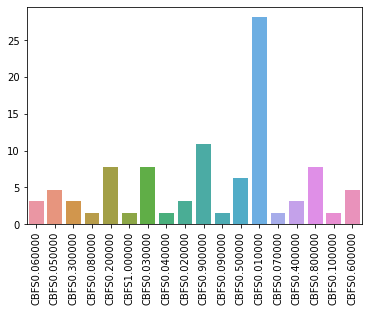

In [205]:
barPlotData = {}

for i in set(data['max_CBFS_Index']):
    ct = len(data.loc[data['max_CBFS_Index']==i,'max_CBFS_Index'])
    barPlotData[i] = (ct/len(data['max_CBFS_Index']))*100


barPlot_Values =  [i for i in barPlotData.values()]
sns.barplot(x=list(barPlotData.keys()),y=barPlot_Values)
plt.xticks(rotation=90)

ax.set(ylabel="Percent")

In [206]:
barPlotData = {}

for i in set(data['min_CBFS_Time_Index']):
    ct = len(data.loc[data['min_CBFS_Time_Index']==i,'min_CBFS_Time_Index'])
    barPlotData[i] = (ct/len(data['min_CBFS_Time_Index']))*100


barPlot_Values =  [i for i in barPlotData.values()]
sns.barplot(x=list(barPlotData.keys()),y=barPlot_Values)
plt.xticks(rotation=90)

ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

In [211]:
seaBData = pd.DataFrame()
for k in range(8):
    if 'bell' not in  allProblems[k]:
        for i in ['BFS','DFS','max_CBFS']:
            tmp = pd.DataFrame(data.loc[data['Problem']==allProblems[k]].groupby(['Problem','SolCount']).agg({i:'last'}).reset_index())
            tmp['NodeType'] = i 
            tmp.rename(columns = {i:"values"},  inplace=True)
            seaBData = seaBData.append(tmp)

# seaBData = seaBData.loc[seaBData['SolCount']<=max(solCount)]
seaBData  = seaBData.sort_values(by='NodeType', ascending = False)


#PLOT THE DATA
# column_order = ['dcmulti.mps','vpm1.mps', 'gen.mps','modglob.mps','gt2.mps','misc06.mps','set1ch.mps']
with sns.plotting_context(font_scale=5.5):
    g = sns.FacetGrid(seaBData, col="Problem" ,hue="NodeType", sharey=False, col_wrap=2, aspect=1.5, height = 4)
    g.map(sns.lineplot, "SolCount", "values", alpha=.7)
    g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=14)
    g.set_axis_labels("Number of requested Solutions", "Diversity", fontsize=12)
    g.set_xticklabels(rotation=90)
    g.add_legend(loc='upper right', fontsize=12)

In [220]:
seaBData = pd.DataFrame()
for k in range(8):
    if 'bell' not in  allProblems[k]:
        for i in ['BFSTime(ms)','DFSTime(ms)','min_CBFS_Time']:
            tmp = pd.DataFrame(data.loc[data['Problem']==allProblems[k]].groupby(['Problem','SolCount']).agg({i:'last'}).reset_index())
            tmp['NodeType'] = i 
            tmp.rename(columns = {i:"values"},  inplace=True)
            seaBData = seaBData.append(tmp)

# seaBData = seaBData.loc[seaBData['SolCount']<=max(solCount)]
seaBData  = seaBData.sort_values(by='NodeType', ascending = False)


#PLOT THE DATA
# column_order = ['dcmulti.mps','vpm1.mps', 'gen.mps','modglob.mps','gt2.mps','misc06.mps','set1ch.mps']
with sns.plotting_context(font_scale=5.5):
    g = sns.FacetGrid(seaBData, col="Problem" ,hue="NodeType", sharey=False, col_wrap=2, aspect=1.5, height = 4)
    g.map(sns.lineplot, "SolCount", "values", alpha=.7)
    g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=14)
    g.set_axis_labels("Number of requested Solutions", "Time", fontsize=12)
    g.set_xticklabels(rotation=90)
    g.add_legend(loc='upper right', fontsize=12)

In [219]:
seaBData = pd.DataFrame()
for k in range(8):
    if 'bell' not in allProblems[k]:
        for i in ['CBFS/DFS:Diversity','CBFS/BFS:Diversity']:
            tmp = pd.DataFrame(data.loc[data['Problem']==allProblems[k]].groupby(['Problem','SolCount']).agg({i:'last'}).reset_index())
            tmp['NodeType'] = i 
            tmp.rename(columns = {i:"values"},  inplace=True)
            
            seaBData = seaBData.append(tmp)

seaBData  = seaBData.sort_values(by='NodeType', ascending = False)
seaBData.head()


#PLOT THE DATA
# column_order = ['dcmulti.mps','vpm1.mps', 'gen.mps','modglob.mps','gt2.mps','misc06.mps','set1ch.mps']
with sns.plotting_context(font_scale=5.5):
    g = sns.FacetGrid(seaBData, col="Problem" ,hue="NodeType", sharey=False, col_wrap=2, aspect=1.5, height = 4)
    g.map(sns.lineplot, "SolCount", "values", alpha=.7)
    g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=14)
    g.set_axis_labels("Number of requested Solutions", "'Diversity: CBFS/Other Methods'", fontsize=12)
    g.set_xticklabels(rotation=90)
    g.add_legend(loc='upper right', fontsize=12)

In [213]:
 seaBData = pd.DataFrame()
for k in range(8):
    if 'bell' not in allProblems[k]:
        for i in ['CBFS/DFS:Time','CBFS/BFS:Time']:
            tmp = pd.DataFrame(data.loc[data['Problem']==allProblems[k]].groupby(['Problem','SolCount']).agg({i:'last'}).reset_index())
            tmp['NodeType'] = i 
            tmp.rename(columns = {i:"values"},  inplace=True)
            
            seaBData = seaBData.append(tmp)

seaBData  = seaBData.sort_values(by='NodeType', ascending = False)
seaBData.head()


#PLOT THE DATA
# column_order = ['dcmulti.mps','vpm1.mps', 'gen.mps','modglob.mps','gt2.mps','misc06.mps','set1ch.mps']
with sns.plotting_context(font_scale=5.5):
    g = sns.FacetGrid(seaBData, col="Problem" ,hue="NodeType", sharey=False, col_wrap=2, aspect=1.5, height = 4)
    g.map(sns.lineplot, "SolCount", "values", alpha=.7)
    g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=14)
    g.set_axis_labels("Number of requested Solutions", "'Time: CBFS/Other Methods'", fontsize=12)
    g.set_xticklabels(rotation=90)
    g.add_legend(loc='upper right', fontsize=12)

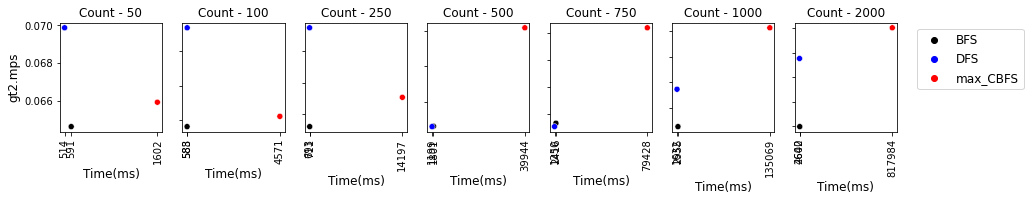

In [170]:

solCount = [50,100, 250, 500, 750, 1000, 2000]

fig,axs = plt.subplots(1, len(solCount), figsize=(15,2))
plotCounter  = 0
subGraphs = []

prob = allProblems[7]

props = {"rotation" : 90}
tmpDict = {'BFSTime(ms)':'BFS', 'DFSTime(ms)':'DFS','min_CBFS_Time':'max_CBFS'}
palette ={'BFS': "black", 'DFS': "blue", 'max_CBFS': "red"}

tpData = data.loc[data['Problem']==prob]

for k in range(len(solCount)):
    
    seaBData = pd.DataFrame()

    for i in ['BFS','DFS','max_CBFS']:
        tmp = pd.DataFrame(tpData.loc[tpData['SolCount']==solCount[k]].groupby(['Problem']).agg({i:'last'}).reset_index())
        tmp['NodeType'] = i 
        tmp.rename(columns = {i:"values"},  inplace=True)
        seaBData = seaBData.append(tmp)

#     print(seaBData)
    seaBTData = pd.DataFrame()

    for i in ['BFSTime(ms)','DFSTime(ms)','min_CBFS_Time']:
        tmp = pd.DataFrame(tpData.loc[tpData['SolCount']==solCount[k]].groupby(['Problem']).agg({i:'last'}).reset_index())
        tmp['NodeType'] = tmpDict.get(i) 
        tmp.rename(columns = {i:"Timevalues"},  inplace=True)
        seaBTData = seaBTData.append(tmp)
    
#     print(seaBTData)
    result = pd.merge(seaBTData,seaBData, on = ('Problem','NodeType')).reset_index(drop=True)
    
    axk = sns.scatterplot(data=result,y='values',x='Timevalues', hue='NodeType', palette = palette, ax =  axs[k//1]) #palette = palette,
    axk.legend_.remove()
    axs[k//1].set_title("Count - " + str(solCount[k]),  fontsize=12)
    axs[k//1].set_xticks(result['Timevalues'])

#     plt.xticks(fontsize=12)
    plt.setp(axs[k//1].get_xticklabels(), **props)


axs.flatten()[-1].legend(loc='upper right', bbox_to_anchor=(2.3, 1.), ncol=1, fontsize=12)

for ax in axs.flat:
    ax.set_xlabel('Time(ms)',fontsize=12)
    ax.set_ylabel(prob,fontsize=12)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()